In [26]:
# This notebook is linked to the AWSubduction_LargeFraWSC_stp2_FinalCorrelations-DHflx.ipynb one 
# It only makes the time series plots to compare 3 experiments

In [27]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [28]:
s_year=1980 ; e_year=2015
RYEAR=str(s_year)+'-'+str(e_year)

In [29]:
# List of GS± experiments names:
case_D='BVHNTMXD'   ; case_P='BVHNTMXP'  ;  case_Ref='BCTGE27NTMX' # case_Ref='BCTGR273'

In [30]:
dsD_read=xr.Dataset() ; 
dsD_read=xr.open_dataset('./NETCDF/BOX-LargeFraWSC/'+case_D+'_y'+RYEAR+'_Full_LargeFraWSC_TiSe_Quant.nc')

In [31]:
dsP_read=xr.Dataset() ; 
dsP_read=xr.open_dataset('./NETCDF/BOX-LargeFraWSC/'+case_P+'_y'+RYEAR+'_Full_LargeFraWSC_TiSe_Quant.nc')

In [32]:
dsRef_read=xr.Dataset() ; 
dsRef_read=xr.open_dataset('./NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_Full_LargeFraWSC_TiSe_Quant.nc')

In [33]:
dsRef_read

<xarray.Dataset>
Dimensions:                      (time: 432)
Coordinates:
  * time                         (time) datetime64[ns] 1980-01-31 ... 2015-12-31
Data variables:
    Ref_Qt_FraWSC_meanTiSe       (time) float64 ...
    Ref_AWTmax_FraWSC_meanTiSe   (time) float64 ...
    Ref_Icearea_FraWSC_meanTiSe  (time) float64 ...
    Ref_massflx_TiSe_nFraWSC     (time) float64 ...
    Ref_SS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_NS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_XS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_SS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_NS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_XS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_FraWSC_S-N_Hflx_ano      (time) float64 ...
    Ref_FraWSC_S-X_Hflx_ano      (time) float64 ...

In [34]:
dsRef_read['Ref_Icearea_FraWSC_meanTiSe'].attrs

OrderedDict([(u'units', u'10^3 km-2')])

## Smoothing step of time-series

########
CAUTION
########
In smoothing the signal with a 12 months window, we remove all hihger frequencies below 12 months.  
The results is that each resulting point is a mixture of 6 points after and before. 
Finaly if we compute lag correlations, they will be quite high over almost all lags in the range [-6 6] months BUT without usefull meaning   

In [35]:
# Apply a 12 months smoothing of monthly data

# First transform the dataset into a Pandas dataframe
dataRef_read=dsRef_read.to_dataframe()
#data_read
# Apply the rolling mean over 12 months
dataRef_rolmean=dataRef_read.rolling(12,center=True).mean()


In [36]:
# Apply a 12 months smoothing of monthly data

# First transform the dataset into a Pandas dataframe
dataP_read=dsP_read.to_dataframe()
#data_read
# Apply the rolling mean over 12 months
dataP_rolmean=dataP_read.rolling(12,center=True).mean()


In [37]:
# Apply a 12 months smoothing of monthly data

# First transform the dataset into a Pandas dataframe
dataD_read=dsD_read.to_dataframe()
#data_read
# Apply the rolling mean over 12 months
dataD_rolmean=dataD_read.rolling(12,center=True).mean()


In [38]:
dataRef_rolmean

,Ref_Qt_FraWSC_meanTiSe,Ref_AWTmax_FraWSC_meanTiSe,Ref_Icearea_FraWSC_meanTiSe,Ref_massflx_TiSe_nFraWSC,Ref_SS_FraWSC_Hflx_TiSe,Ref_NS_FraWSC_Hflx_TiSe,Ref_XS_FraWSC_Hflx_TiSe,Ref_SS_FraWSC_Vol_TiSe,Ref_NS_FraWSC_Vol_TiSe,Ref_XS_FraWSC_Vol_TiSe,Ref_FraWSC_S-N_Hflx_ano,Ref_FraWSC_S-X_Hflx_ano
time,,,,,,,,,,,,
1980-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-07-31,-114.752699,2.873903,62.549679,-2.162943e+07,61.679837,10.542583,12.478291,4.450658,1.162594,1.722772,51.137254,49.201547
1980-08-31,-121.706200,2.850069,63.068071,-2.366150e+07,61.116435,10.285601,13.098474,4.456431,1.172036,1.839543,50.830834,48.017961
1980-09-30,-120.528508,2.827646,63.059196,-2.401426e+07,63.528861,11.304334,14.167332,4.630057,1.333272,2.032854,52.224526,49.361529


In [39]:
dsRef_read

<xarray.Dataset>
Dimensions:                      (time: 432)
Coordinates:
  * time                         (time) datetime64[ns] 1980-01-31 ... 2015-12-31
Data variables:
    Ref_Qt_FraWSC_meanTiSe       (time) float64 -232.5 -233.2 ... -237.9 -299.9
    Ref_AWTmax_FraWSC_meanTiSe   (time) float64 2.566 2.445 2.367 ... 3.983 3.52
    Ref_Icearea_FraWSC_meanTiSe  (time) float64 70.28 77.96 79.19 ... 48.7 39.94
    Ref_massflx_TiSe_nFraWSC     (time) float64 -2.334e+07 ... -1.458e+07
    Ref_SS_FraWSC_Hflx_TiSe      (time) float64 87.67 67.91 ... 92.28 127.8
    Ref_NS_FraWSC_Hflx_TiSe      (time) float64 26.79 10.88 ... 7.595 24.21
    Ref_XS_FraWSC_Hflx_TiSe      (time) float64 14.09 10.12 ... 14.08 19.67
    Ref_SS_FraWSC_Vol_TiSe       (time) float64 5.901 4.881 5.463 ... 5.26 6.99
    Ref_NS_FraWSC_Vol_TiSe       (time) float64 2.925 1.138 ... 0.1342 1.649
    Ref_XS_FraWSC_Vol_TiSe       (time) float64 1.718 1.204 ... 1.241 1.812
    Ref_FraWSC_S-N_Hflx_ano      (time) float64 60.

# Clean Plot for the talk

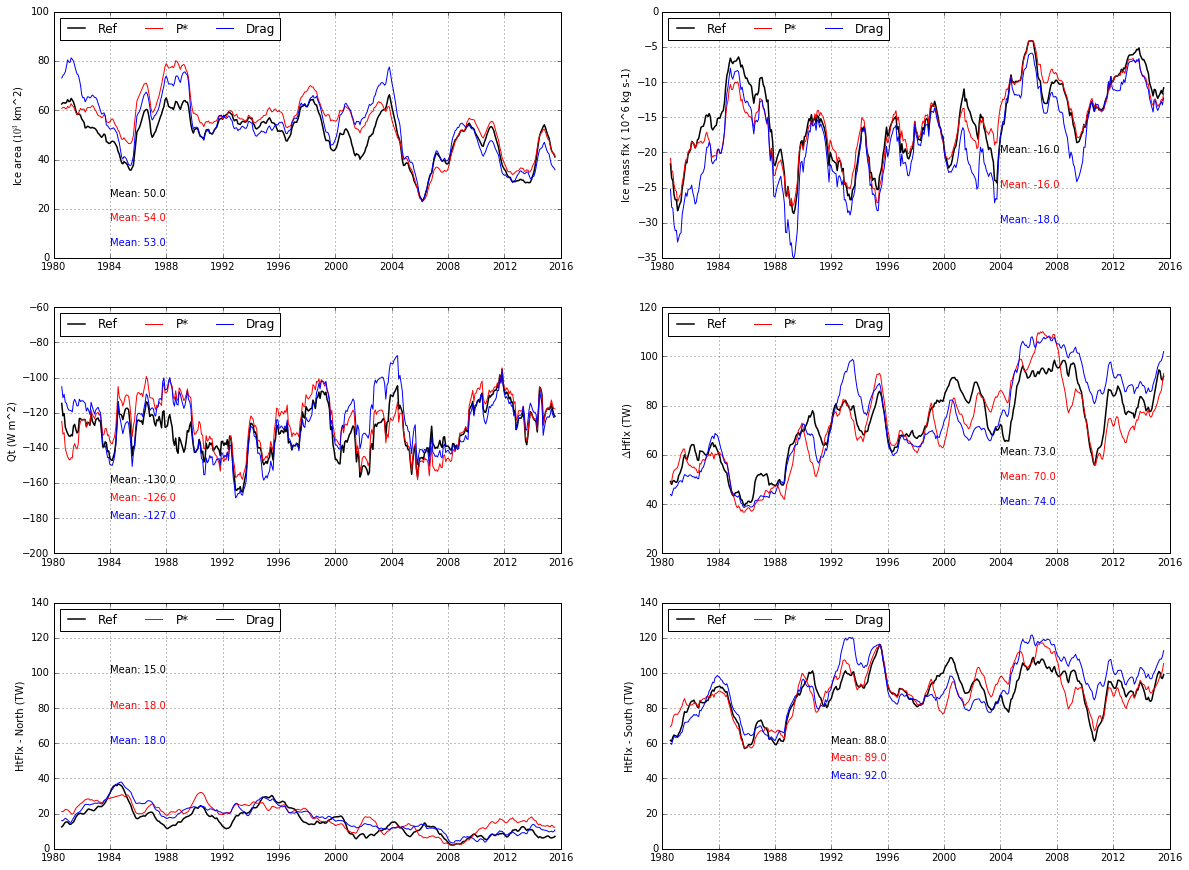

In [40]:
plt.figure(figsize=(20,15))

####################################################################################

ax=plt.subplot(321) 
ax.plot(dsRef_read['time'],dataRef_rolmean['Ref_Icearea_FraWSC_meanTiSe'],'k',label='Ref', linewidth=1.5)
ax.plot(dsRef_read['time'],dataP_rolmean['Ref_Icearea_FraWSC_meanTiSe'],'r',label='P*')
ax.plot(dsRef_read['time'],dataD_rolmean['Ref_Icearea_FraWSC_meanTiSe'],'b',label='Drag')
plt.text('1984',25.,r'Mean: '+str(np.round(dataRef_rolmean['Ref_Icearea_FraWSC_meanTiSe'].mean())),color='k')
plt.text('1984',15.,r'Mean: '+str(np.round(dataP_rolmean['Ref_Icearea_FraWSC_meanTiSe'].mean())),color='r')
plt.text('1984',5.,r'Mean: '+str(np.round(dataD_rolmean['Ref_Icearea_FraWSC_meanTiSe'].mean())),color='b')

ax.set_ylabel(r'Ice area ($10^3$ km^2)')
ax.set_ylim([0.,100.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)
ax.legend(ncol=3,loc='upper left')

####################################################################################


ax=plt.subplot(322)
ax.plot(dsRef_read['time'],dataRef_rolmean['Ref_massflx_TiSe_nFraWSC']*1e-6,'k',label='Ref', linewidth=1.5)
ax.plot(dsRef_read['time'],dataP_rolmean['Ref_massflx_TiSe_nFraWSC']*1e-6,'r',label='P*')
ax.plot(dsRef_read['time'],dataD_rolmean['Ref_massflx_TiSe_nFraWSC']*1e-6,'b',label='Drag')
plt.text('2004',-20.,r'Mean: '+str(np.round(dataRef_rolmean['Ref_massflx_TiSe_nFraWSC'].mean()*1e-6)),color='k')
plt.text('2004',-25.,r'Mean: '+str(np.round(dataP_rolmean['Ref_massflx_TiSe_nFraWSC'].mean()*1e-6)),color='r')
plt.text('2004',-30.,r'Mean: '+str(np.round(dataD_rolmean['Ref_massflx_TiSe_nFraWSC'].mean()*1e-6)),color='b')


ax.set_ylabel(r'Ice mass flx ( 10^6 kg s-1)')
ax.set_ylim([-35.,0.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)
ax.legend(ncol=3,loc='upper left')

####################################################################################

ax=plt.subplot(323)
ax.plot(dsRef_read['time'],dataRef_rolmean['Ref_Qt_FraWSC_meanTiSe'],'k',label='Ref', linewidth=1.5)
ax.plot(dsRef_read['time'],dataP_rolmean['Ref_Qt_FraWSC_meanTiSe'],'r',label='P*')
ax.plot(dsRef_read['time'],dataD_rolmean['Ref_Qt_FraWSC_meanTiSe'],'b',label='Drag')
plt.text('1984',-160.,r'Mean: '+str(np.round(dataRef_rolmean['Ref_Qt_FraWSC_meanTiSe'].mean())),color='k')
plt.text('1984',-170.,r'Mean: '+str(np.round(dataP_rolmean['Ref_Qt_FraWSC_meanTiSe'].mean())),color='r')
plt.text('1984',-180,r'Mean: '+str(np.round(dataD_rolmean['Ref_Qt_FraWSC_meanTiSe'].mean())),color='b')

ax.set_ylabel(r'Qt (W m^2)')
ax.set_ylim([-200.,-60.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)
ax.legend(ncol=3,loc='upper left')

####################################################################################

ax=plt.subplot(324) 
ax.plot(dsRef_read['time'],dataRef_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'k',label='Ref', linewidth=1.5)
ax.plot(dsRef_read['time'],dataP_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'r',label='P*')
ax.plot(dsRef_read['time'],dataD_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'b',label='Drag')
plt.text('2004',60.,r'Mean: '+str(np.round(dataRef_rolmean['Ref_FraWSC_S-X_Hflx_ano'].mean())),color='k')
plt.text('2004',50.,r'Mean: '+str(np.round(dataP_rolmean['Ref_FraWSC_S-X_Hflx_ano'].mean())),color='r')
plt.text('2004',40,r'Mean: '+str(np.round(dataD_rolmean['Ref_FraWSC_S-X_Hflx_ano'].mean())),color='b')

ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,120.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)
ax.legend(ncol=3,loc='upper left')


####################################################################################

ax=plt.subplot(326)
ax.plot(dsRef_read['time'],dataRef_rolmean['Ref_SS_FraWSC_Hflx_TiSe'],'k',label='Ref', linewidth=1.5)
ax.plot(dsRef_read['time'],dataP_rolmean['Ref_SS_FraWSC_Hflx_TiSe'],'r',label='P*')
ax.plot(dsRef_read['time'],dataD_rolmean['Ref_SS_FraWSC_Hflx_TiSe'],'b',label='Drag')
plt.text('1992',60.,r'Mean: '+str(np.round(dataRef_rolmean['Ref_SS_FraWSC_Hflx_TiSe'].mean())),color='k')
plt.text('1992',50.,r'Mean: '+str(np.round(dataP_rolmean['Ref_SS_FraWSC_Hflx_TiSe'].mean())),color='r')
plt.text('1992',40,r'Mean: '+str(np.round(dataD_rolmean['Ref_SS_FraWSC_Hflx_TiSe'].mean())),color='b')


ax.set_ylabel(r'HtFlx - South (TW)')
ax.set_ylim([0.,140.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)
ax.legend(ncol=3,loc='upper left')

####################################################################################


ax=plt.subplot(325)


ax.plot(dsRef_read['time'],dataRef_rolmean['Ref_XS_FraWSC_Hflx_TiSe'],'k',label='Ref', linewidth=1.5)
ax.plot(dsRef_read['time'],dataP_rolmean['Ref_XS_FraWSC_Hflx_TiSe'],'r',label='P*')
ax.plot(dsRef_read['time'],dataD_rolmean['Ref_XS_FraWSC_Hflx_TiSe'],'b',label='Drag')
plt.text('1984',100.,r'Mean: '+str(np.round(dataRef_rolmean['Ref_XS_FraWSC_Hflx_TiSe'].mean())),color='k')
plt.text('1984',80.,r'Mean: '+str(np.round(dataP_rolmean['Ref_XS_FraWSC_Hflx_TiSe'].mean())),color='r')
plt.text('1984',60,r'Mean: '+str(np.round(dataD_rolmean['Ref_XS_FraWSC_Hflx_TiSe'].mean())),color='b')

ax.set_ylabel(r'HtFlx - North (TW)')
ax.set_ylim([0.,140.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

ax.legend(ncol=3,loc='upper left')


dosave=True
if dosave: plt.savefig('./FIGURES/'+case_Ref+'-'+case_D+'-'+case_P+'_y'+RYEAR+'_TiSe_LargeFraWSC_12mSmooth_DHflx_vs_Qt_IceArea_SNHtFlx.pdf')
dosave=False

# Clean Plot for the talk, same as above but anomalies against the reference 

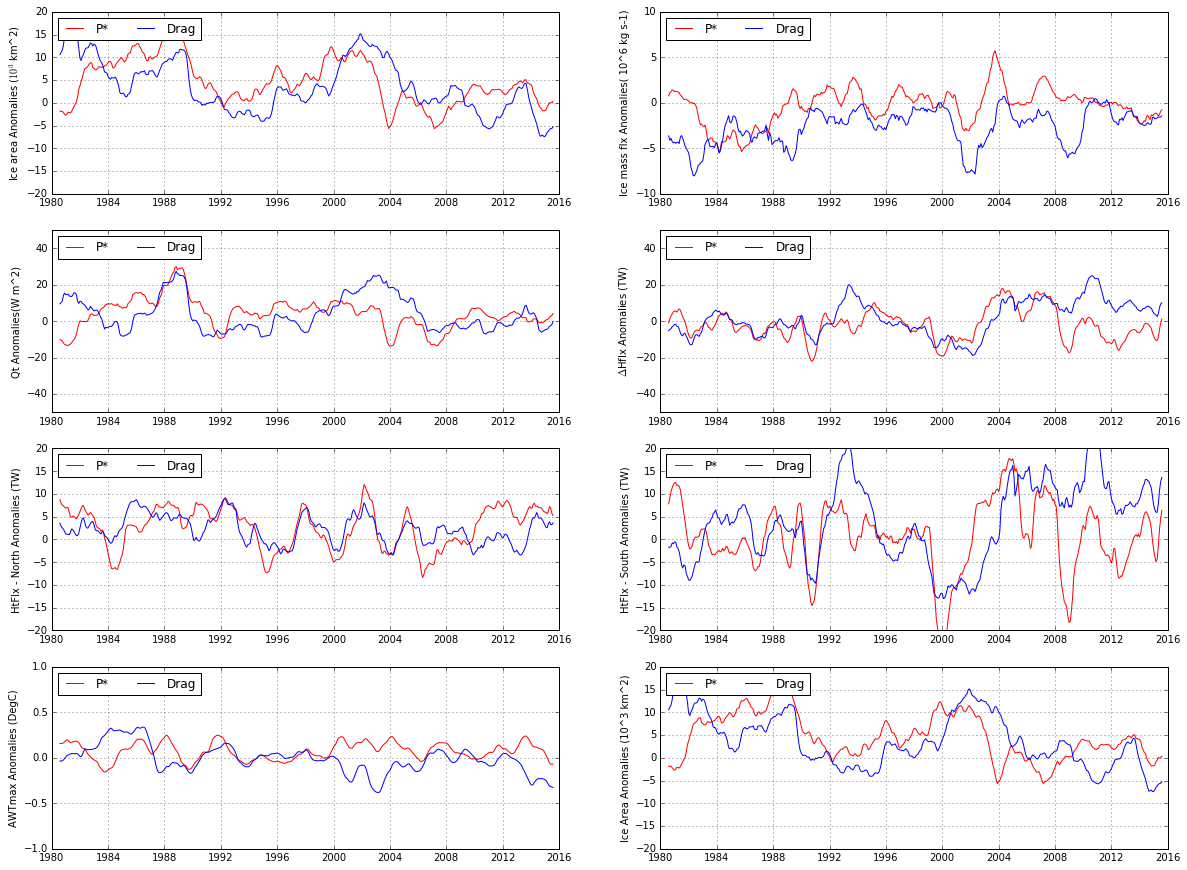

In [41]:
plt.figure(figsize=(20,15))

####################################################################################

ax=plt.subplot(421) 
ax.plot(dsRef_read['time'],dataP_rolmean['Ref_Icearea_FraWSC_meanTiSe']-dataRef_rolmean['Ref_Icearea_FraWSC_meanTiSe'],'r',label='P*')
ax.plot(dsRef_read['time'],dataD_rolmean['Ref_Icearea_FraWSC_meanTiSe']-dataRef_rolmean['Ref_Icearea_FraWSC_meanTiSe'],'b',label='Drag')

ax.set_ylabel(r'Ice area Anomalies ($10^3$ km^2)')
ax.set_ylim([-20.,20.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)
ax.legend(ncol=3,loc='upper left')

####################################################################################


ax=plt.subplot(422)
ax.plot(dsRef_read['time'],(dataP_rolmean['Ref_massflx_TiSe_nFraWSC']-dataRef_rolmean['Ref_massflx_TiSe_nFraWSC'])*1e-6,'r',label='P*')
ax.plot(dsRef_read['time'],(dataD_rolmean['Ref_massflx_TiSe_nFraWSC']-dataRef_rolmean['Ref_massflx_TiSe_nFraWSC'])*1e-6,'b',label='Drag')

ax.set_ylabel(r'Ice mass flx Anomalies( 10^6 kg s-1)')
ax.set_ylim([-10.,10.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)
ax.legend(ncol=3,loc='upper left')

####################################################################################

ax=plt.subplot(423)
ax.plot(dsRef_read['time'],dataP_rolmean['Ref_Qt_FraWSC_meanTiSe']-dataRef_rolmean['Ref_Qt_FraWSC_meanTiSe'],'r',label='P*')
ax.plot(dsRef_read['time'],dataD_rolmean['Ref_Qt_FraWSC_meanTiSe']-dataRef_rolmean['Ref_Qt_FraWSC_meanTiSe'],'b',label='Drag')

ax.set_ylabel(r'Qt Anomalies(W m^2)')
ax.set_ylim([-50.,50.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)
ax.legend(ncol=3,loc='upper left')

####################################################################################

ax=plt.subplot(424) 
ax.plot(dsRef_read['time'],dataP_rolmean['Ref_FraWSC_S-X_Hflx_ano']-dataRef_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'r',label='P*')
ax.plot(dsRef_read['time'],dataD_rolmean['Ref_FraWSC_S-X_Hflx_ano']-dataRef_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'b',label='Drag')

ax.set_ylabel(r'$\Delta$Hflx Anomalies (TW)')
ax.set_ylim([-50.,50.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)
ax.legend(ncol=3,loc='upper left')


####################################################################################

ax=plt.subplot(426)
ax.plot(dsRef_read['time'],dataP_rolmean['Ref_SS_FraWSC_Hflx_TiSe']-dataRef_rolmean['Ref_SS_FraWSC_Hflx_TiSe'],'r',label='P*')
ax.plot(dsRef_read['time'],dataD_rolmean['Ref_SS_FraWSC_Hflx_TiSe']-dataRef_rolmean['Ref_SS_FraWSC_Hflx_TiSe'],'b',label='Drag')

ax.set_ylabel(r'HtFlx - South Anomalies (TW)')
ax.set_ylim([-20.,20.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)
ax.legend(ncol=3,loc='upper left')

####################################################################################


ax=plt.subplot(425)
ax.plot(dsRef_read['time'],dataP_rolmean['Ref_XS_FraWSC_Hflx_TiSe']-dataRef_rolmean['Ref_XS_FraWSC_Hflx_TiSe'],'r',label='P*')
ax.plot(dsRef_read['time'],dataD_rolmean['Ref_XS_FraWSC_Hflx_TiSe']-dataRef_rolmean['Ref_XS_FraWSC_Hflx_TiSe'],'b',label='Drag')
ax.set_ylabel(r'HtFlx - North Anomalies (TW)')
ax.set_ylim([-20.,20.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

ax.legend(ncol=3,loc='upper left')


ax=plt.subplot(427)
ax.plot(dsRef_read['time'],dataP_rolmean['Ref_AWTmax_FraWSC_meanTiSe']-dataRef_rolmean['Ref_AWTmax_FraWSC_meanTiSe'],'r',label='P*')
ax.plot(dsRef_read['time'],dataD_rolmean['Ref_AWTmax_FraWSC_meanTiSe']-dataRef_rolmean['Ref_AWTmax_FraWSC_meanTiSe'],'b',label='Drag')
ax.set_ylabel(r'AWTmax Anomalies (DegC)')
ax.set_ylim([-1.,1.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)
ax.legend(ncol=3,loc='upper left')



ax=plt.subplot(428)
ax.plot(dsRef_read['time'],dataP_rolmean['Ref_Icearea_FraWSC_meanTiSe']-dataRef_rolmean['Ref_Icearea_FraWSC_meanTiSe'],'r',label='P*')
ax.plot(dsRef_read['time'],dataD_rolmean['Ref_Icearea_FraWSC_meanTiSe']-dataRef_rolmean['Ref_Icearea_FraWSC_meanTiSe'],'b',label='Drag')
ax.set_ylabel(r'Ice Area Anomalies (10^3 km^2)')
ax.set_ylim([-20.,20.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)
ax.legend(ncol=3,loc='upper left')


dosave=True
if dosave: plt.savefig('./FIGURES/'+case_Ref+'-'+case_D+'-'+case_P+'_y'+RYEAR+'_ANOTiSe_LargeFraWSC_12mSmooth_DHflx_vs_Qt_IceArea_SNHtFlx.pdf')
dosave=False


# Regroup Reference experiment Heat flux @ south & North

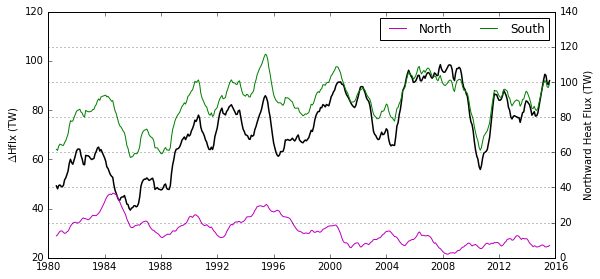

In [18]:
plt.figure(figsize=(20,15))

ax=plt.subplot(321)

ax=plt.subplot(321) ; ax2=plt.twinx()
ax.plot(dsRef_read['time'],dataRef_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'k',label='Ref', linewidth=1.5)
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,120.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)
#ax.legend(loc='upper left')

col2,=ax2.plot(dsRef_read['time'],dataRef_rolmean['Ref_XS_FraWSC_Hflx_TiSe'],'m',label='North', linewidth=1.)
col2,=ax2.plot(dsRef_read['time'],dataRef_rolmean['Ref_SS_FraWSC_Hflx_TiSe'],'g',label='South', linewidth=1.)

ax2.set_ylim([0.,140.])
ax2.set_ylabel(r'Northward Heat Flux (TW)')

#ax2.yaxis.label.set_color(col2.get_color())
#ax2.tick_params(axis='y', colors=col2.get_color())
ax2.legend(ncol=3,loc='upper right')

####################################################################################

dosave=False
if dosave: plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_TiSe_LargeFraWSC_12mSmooth_SNHtFlx.pdf')
dosave=False

## Refine the plots to get only the one usefull for the talk

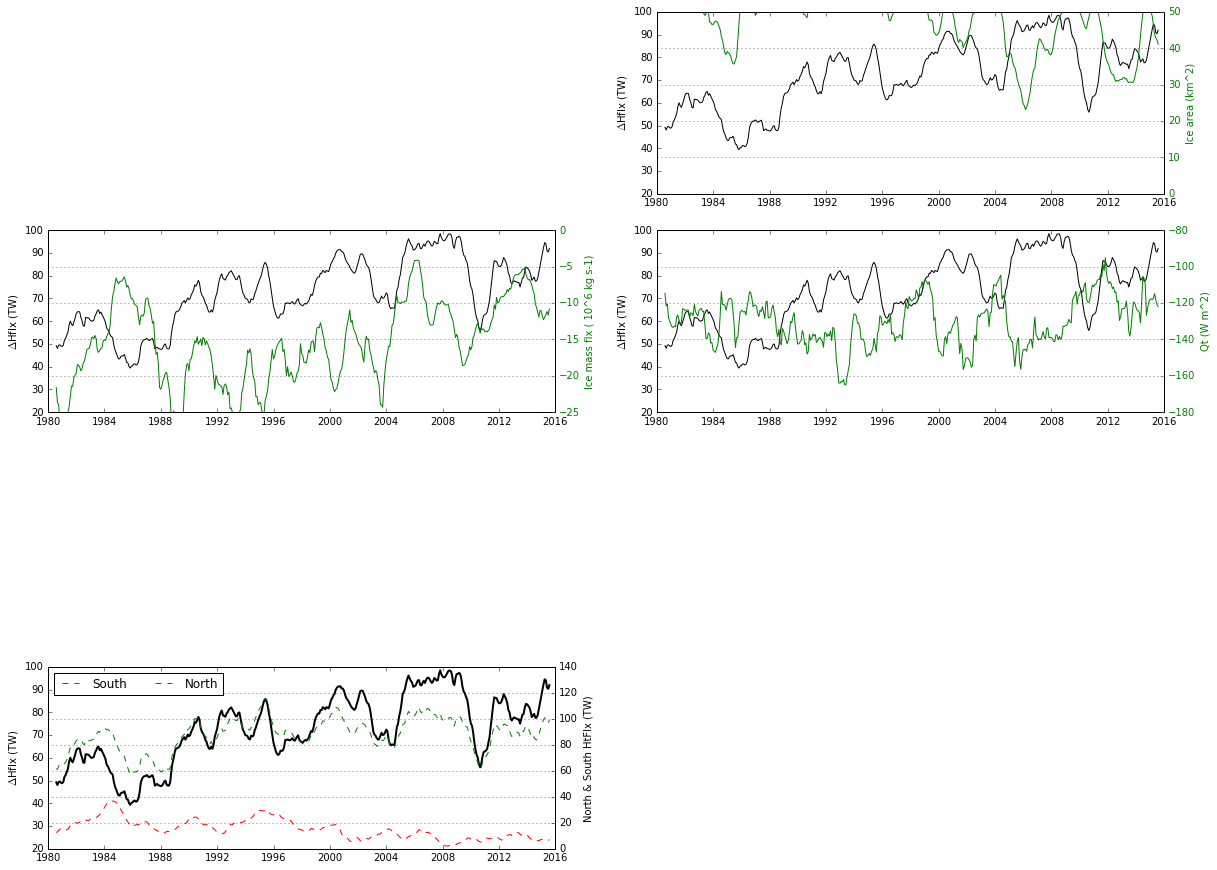

In [24]:
do_refineP=False

if do_refineP :
    plt.figure(figsize=(20,15))

    ####################################################################################
    ax=plt.subplot(422) ; ax2=plt.twinx()
    ax.plot(dataRef_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'k')
    ax.set_ylabel(r'$\Delta$Hflx (TW)')
    ax.set_ylim([20.,100.])
    ax.set_xlim(str(s_year),str(e_year+1))
    plt.grid(True)

    col2,=ax2.plot(dataRef_rolmean['Ref_Icearea_FraWSC_meanTiSe'],'g')
    ax2.set_ylim([0.,100.])
    ax2.set_ylabel(r'Ice area (km^2)')

    ax2.yaxis.label.set_color(col2.get_color())
    ax2.tick_params(axis='y', colors=col2.get_color())

    ####################################################################################

    ax=plt.subplot(423) ; ax2=plt.twinx()
    ax.plot(dataRef_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'k')
    ax.set_ylabel(r'$\Delta$Hflx (TW)')
    ax.set_ylim([20.,100.])
    ax.set_xlim(str(s_year),str(e_year+1))
    plt.grid(True)

    col2,=ax2.plot(dataRef_rolmean['Ref_massflx_TiSe_nFraWSC']*1e-6,'g')
    ax2.set_ylim([-25.,0.])
    ax2.set_ylabel(r'Ice mass flx ( 10^6 kg s-1)')

    ax2.yaxis.label.set_color(col2.get_color())
    ax2.tick_params(axis='y', colors=col2.get_color())
    ####################################################################################

    ax=plt.subplot(424) ; ax2=plt.twinx()
    ax.plot(dataRef_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'k')
    ax.set_ylabel(r'$\Delta$Hflx (TW)')
    ax.set_ylim([20.,100.])
    ax.set_xlim(str(s_year),str(e_year+1))
    plt.grid(True)

    col2,=ax2.plot(dataRef_rolmean['Ref_Qt_FraWSC_meanTiSe'],'g')
    ax2.set_ylim([-180.,-80.])
    ax2.set_ylabel(r'Qt (W m^2)')

    ax2.yaxis.label.set_color(col2.get_color())
    ax2.tick_params(axis='y', colors=col2.get_color())

    ####################################################################################
    ax=plt.subplot(427) ; ax2=plt.twinx()
    ax.plot(dataRef_rolmean['Ref_FraWSC_S-X_Hflx_ano'],'k',linewidth=2)
    ax.set_ylabel(r'$\Delta$Hflx (TW)')
    ax.set_ylim([20.,100.])
    ax.set_xlim(str(s_year),str(e_year+1))
    plt.grid(True)

    col2,=ax2.plot(dataRef_rolmean['Ref_SS_FraWSC_Hflx_TiSe'],'g--', label='South')
    col3,=ax2.plot(dataRef_rolmean['Ref_XS_FraWSC_Hflx_TiSe'],'r--', label='North')

    ax2.set_ylim([0.,140.])
    ax2.set_ylabel(r'North & South HtFlx (TW)')
    #ax2.yaxis.label.set_color(col2.get_color())

    ax2.legend(ncol=2,loc='upper left')

    ####################################################################################
    dosave=False
    if dosave: plt.savefig(case_Ref+'_y'+RYEAR+'_TiSe_LargeFraWSC_DHflx_vs_Qt_IceArea_Massflx_SNHtFlx.pdf')
    dosave=False